# k-Nearest Neighbors

- Pros: High accuracy, insensitive to outliers, no assumptions about data
- Cons: Computationally expensive, requires a lot of memory


In [23]:
# -*- coding: utf-8 -*-
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.DataFrame({'x1': [1.0, 1.0, 0, 0], 'x2': [1.1, 1.0, 0, 0.1], 'Labels': ['A', 'A', 'B', 'B']})

In [17]:
df

,Labels,x1,x2
0,A,1.0,1.1
1,A,1.0,1.0
2,B,0.0,0.0
3,B,0.0,0.1


In [18]:
group = df.loc[:, ['x1', 'x2']].values

In [21]:
labels = df.Labels.values

In [39]:
def classify_kNN(inX, dataSet, labels, k):
    '''
    Parameters:
        inX: inputdata (numpy, shape=(1, 2))
        dataSet: train dataset(numpy)
        lables: the labels corresponding dataSet
        k: number of nearest neighbors(int)
    Return:
        sortedClassCount[0][0]: inX's label 
    '''
    # Calculate distance
    diffMat = inX - dataSet
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distances = sqDistance**0.5
    
    # Sort the distance 
    sortedDistIndices = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [40]:
classify_kNN([0, 0], group, labels, 3)

'B'

## Improving matches from a dating site with kNN

In [41]:
df = pd.read_csv('datingTestSet.txt', names=['x1', 'x2', 'x3', 'Labels'], sep='\t')

In [43]:
df.head()

,x1,x2,x3,Labels
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [44]:
datingDataMat = df.loc[:, ['x1', 'x2', 'x3']].values

In [47]:
labels = df.Labels.values

### Observation

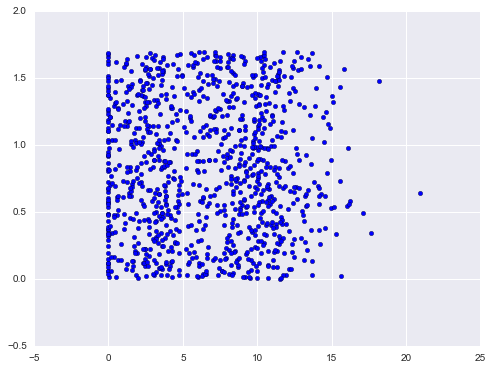

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])

In [80]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = (dataSet - minVals)/ranges
    return normDataSet, ranges, minVals

In [81]:
normMat, ranges, minVals = autoNorm(datingDataMat)